In [ ]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
import torch
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [ ]:
path = "Dataset\mitbih_database"
filenames = next(os.walk(path))[2]
records=list()
annotations=list()
filenames.sort()
for f in filenames:
    filename, file_extension = os.path.splitext(f)
    if(file_extension=='.csv'):
        records.append(path+'/'+filename+file_extension)
    else:
        annotations.append(path+'/'+filename+file_extension)

In [ ]:
def get_record_signals(index):
    signals = []
    labels = []
    with open(records[index],'r') as csvfile:
        filereader = csv.reader(csvfile,delimiter=',',quotechar='|')
        row_index = -1
        for row in filereader:
            if(row_index >= 0):
                signals.insert(row_index, int(row[1]))
            row_index += 1
        signals = np.array(signals)
    with open(annotations[index],'r') as csvfile:
        filereader = csv.reader(csvfile,delimiter=',',quotechar='|')
        row_index = -1
        for row in filereader:
            if(row_index >= 0):
                elements = list(filter(lambda x: len(x) > 0, row[0].split(" ")))
                labels.insert(row_index, [int(elements[1]), elements[2]])
            row_index += 1
        labels = np.array(labels)
    return signals, labels

In [ ]:
signals, labels = get_record_signals(6)
print("Number of samples:", len(signals))
print("Value Range:", np.min(signals), "->", np.max(signals))
print("Classes:", np.unique(labels[:, 1]))

In [ ]:
def process_data(window_size):
    X = []
    y = []

    half_w = window_size // 2
    valid_labels = {'A', 'L', 'N', 'R', 'V'}

    for i in range(len(records)):
        signals, labels = get_record_signals(i)
        sig_len = len(signals)

        mask = np.isin(labels[:, 1], list(valid_labels))
        filtered_labels = labels[mask]

        for label in filtered_labels:
            center = int(label[0])
            start = center - half_w
            end = center + half_w

            if start < 0 or end > sig_len:
                continue

            X.append(signals[start:end])
            y.append(label[1])

    return X, y


In [61]:
print("Total samples:", len(X))

Total samples: 100033


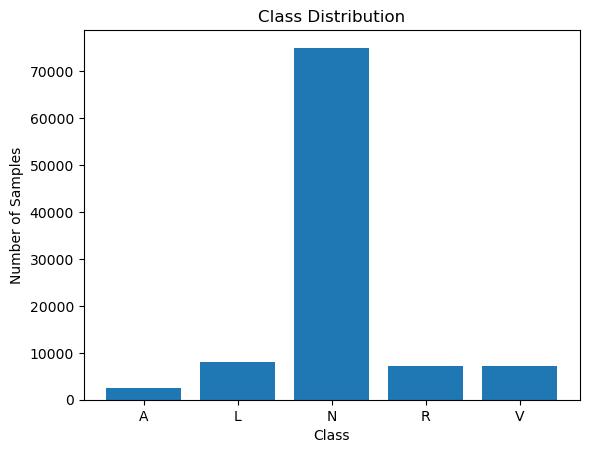

In [57]:
values, counts = np.unique(y, return_counts=True)
plt.bar(values, counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"Using device: {device}")
encoder = OneHotEncoder(sparse=False)
scaler = MinMaxScaler()

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(720,), name="InputLayer"))
model.add(Dense(units=32, activation="relu", name=f"HiddenLayer-1"))
model.add(Dropout(0.1))
model.add(Dense(1, activation=''))

model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(train_dataset,
          epochs=20,
          batch_size=128,
          validation_data=test_dataset)